## Speaker diarisation is the process of partitioning an audio stream containing human speech into homogeneous segments according to the identity of each speaker

In [1]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import find_peaks
from sklearn.cluster import KMeans
from pydub import AudioSegment
from pydub.utils import make_chunks
import matplotlib.pyplot as plt


In [2]:
##Load and preprocess the audio file

In [3]:
audio_file="/Users/sushilkumarbarai/speaker_diar/example_audio.wav"

In [4]:
def load_audio(file_path):
    audio = AudioSegment.from_file(file_path)
    audio = audio.set_channels(1)  # Convert to mono
    audio = audio.set_frame_rate(16000)  # Resample to 16kHz
    return audio

audio = load_audio(file_path=audio_file)


In [5]:
audio

In [6]:
#Split the audio into chunks

In [7]:
chunk_length_ms = 1000  # 1 second
chunks = make_chunks(audio, chunk_length_ms)


In [8]:
chunks

In [9]:
##Feature extraction
###Extract features from each chunk. Here we'll use simple energy-based features, but you can extend this to use more sophisticated features like MFCCs.

In [10]:
def extract_features(chunk):
    # Convert chunk to numpy array
    samples = np.array(chunk.get_array_of_samples())
    # Normalize samples
    samples = samples / np.max(np.abs(samples))
    # Compute energy
    energy = np.sum(samples ** 2) / len(samples)
    return [energy]

features = np.array([extract_features(chunk) for chunk in chunks])


In [11]:
features

array([[0.01741032],
       [0.02254386],
       [0.0085391 ],
       [0.0193569 ],
       [0.0127736 ],
       [0.04867202],
       [0.0422168 ],
       [0.06384977],
       [0.08860274],
       [0.02350878],
       [0.03010058],
       [0.02662369],
       [0.02503251],
       [0.01573721],
       [0.00119923]])

In [12]:
##Apply K-means clustering

In [13]:
num_speakers = 2  # Change this based on your use case
kmeans = KMeans(n_clusters=num_speakers, random_state=0).fit(features)
labels = kmeans.labels_


/Users/sushilkumarbarai/.mypyenv/pyenv38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
labels

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
range(len(labels))

range(0, 15)

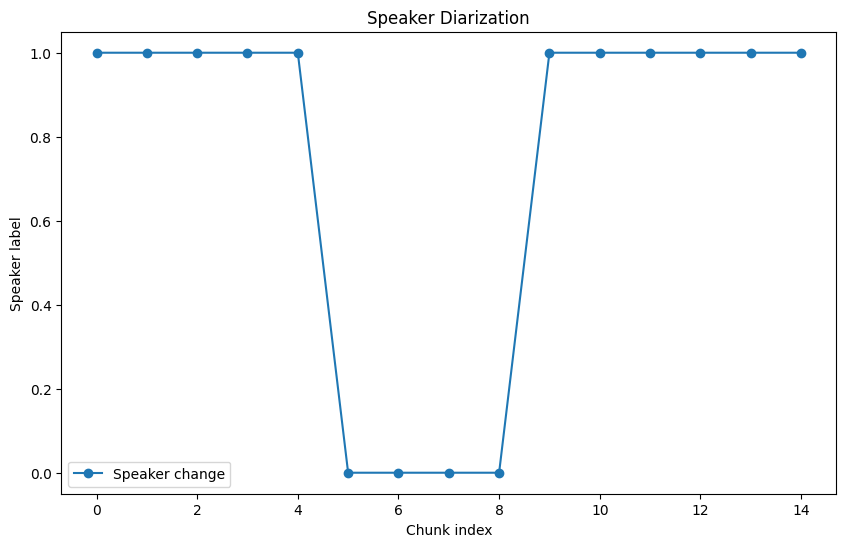

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(labels)), labels, 'o-', label='Speaker change')
plt.xlabel('Chunk index')
plt.ylabel('Speaker label')
plt.title('Speaker Diarization')
plt.legend()
plt.show()


In [17]:
def save_diarized_audio(chunks, labels, output_prefix):
    speaker_segments = [[] for _ in range(num_speakers)]
    
    for chunk, label in zip(chunks, labels):
        speaker_segments[label].append(chunk)
    
    for i, segments in enumerate(speaker_segments):
        combined_segment = segments[0]
        for segment in segments[1:]:
            combined_segment += segment
        combined_segment.export(f"{output_prefix}_speaker_{i}.wav", format="wav")

save_diarized_audio(chunks, labels, 'output')


In [18]:
chunks

In [19]:
import IPython
IPython.display.Audio("output_speaker_0.wav")

In [20]:
IPython.display.Audio("output_speaker_1.wav")